# Historical evolution of the Greeks

In [1]:
import requests
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

formatter = mdates.DateFormatter("%Y-%m-%d")

In [12]:
#target_contract = "BB210917C00012000"
target_contract = "PYPL210820C00280000"
req = requests.get("https://api.syncretism.io/historical/" + target_contract)
data = req.json()

In [13]:
ts = [d["timestamp"] for d in data]
dates= [dt.datetime.fromtimestamp(t) for t in ts]
bid = [d["bid"] for d in data]
ask = [d["ask"] for d in data]
iv = [d["impliedvolatility"] for d in data]
stock_price = [d["regularmarketprice"] for d in data]
volume = [d["volume"] for d in data]
open_interest = [d["openinterest"] for d in data]
delta = [d["delta"] for d in data]
gamma = [d["gamma"] for d in data]
theta = [d["theta"] for d in data]
vega = [d["vega"] for d in data]
print("Loaded " + str(len(ts)) + " ticks for " + target_contract)

Loaded 66 ticks for PYPL210820C00280000


## Delta

Delta shows the speed at which the option's premium increases for a one dollar change in the underlying stock's price.

<Figure size 864x1008 with 0 Axes>

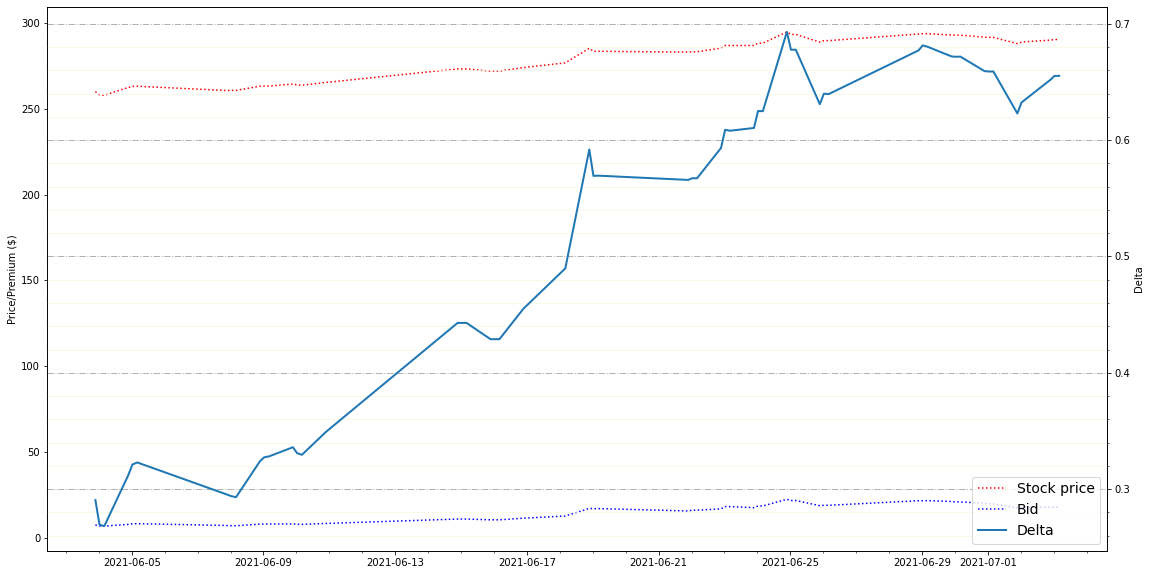

In [14]:
plt.figure(figsize=(12, 14)) 
fig,ax = plt.subplots()
fig.tight_layout=True
ax.set_ylabel("Price/Premium ($)")
ax.xaxis.set_major_formatter(formatter)
line1, = ax.plot(dates, stock_price, 'r:', label='Stock price')
line2, = ax.plot(dates, bid, 'b:', label='Bid')
ax2 = ax.twinx()
ax2.set_ylabel("Delta")
line3, = ax2.plot(dates, delta, '-', label='Delta', linewidth=2)
plt.legend(handles=[line1, line2, line3], loc='lower right', fontsize=14)
#major grid lines
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.6, ls='-', lw=1)
plt.show()

## Vega

Vega measures the impact of volatility changes on the option's premium.

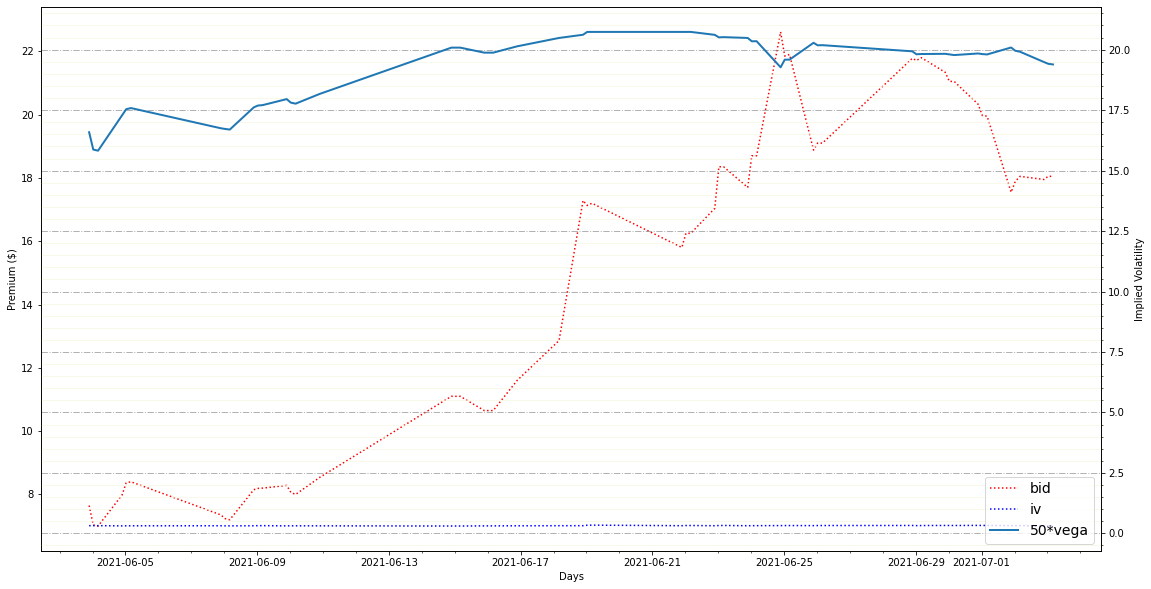

In [15]:
fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel("Days")
ax.set_ylabel("Premium ($)")
line1, = ax.plot(dates, bid, 'r:', label='bid')
ax2 = ax.twinx()
ax2.set_ylabel("Implied Volatility")
line3, = ax2.plot(dates, [50*e for e in vega], '-', label='50*vega', linewidth=2)
line2, = ax2.plot(dates, iv, 'b:', label='iv')
plt.legend(handles=[line1, line2, line3], loc='lower right', fontsize=14)
#major grid lines
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.6, ls='-', lw=1)
plt.rcParams['figure.figsize'] = [19, 10]
plt.show()

## Theta

Theta is the rate at which the premium will decay as time passes.

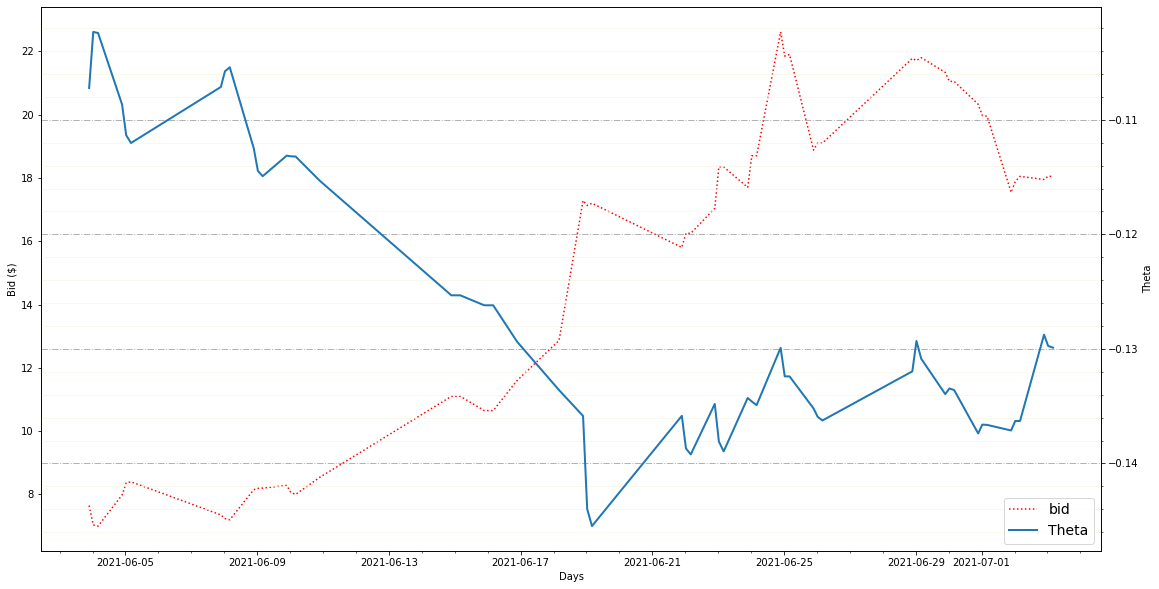

In [16]:
fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel("Days")
ax.set_ylabel("Bid ($)")
line1, = ax.plot(dates, bid, 'r:', label='bid')
ax2 = ax.twinx()
ax2.set_ylabel("Theta")
line2, = ax2.plot(dates, theta, '-', label='Theta', linewidth=2)
plt.legend(handles=[line1, line2], loc='lower right', fontsize=14)
#major grid lines
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.6, ls='-', lw=1)
plt.rcParams['figure.figsize'] = [19, 10]
plt.show()